# Topic Modeling — With Tomotopy

<a href="https://colab.research.google.com/github/chu-ise/411A-2022/blob/main/notebooks/09/09-04_tomotopy_fomc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [ ]:
from ekorpkit import eKonf

cfg = eKonf.compose(config_group='corpus')
cfg.name = 'fomc'
cfg.data_dir = "${cached_path:'https://github.com/entelecheia/ekorpkit-config/raw/main/data/fomc.zip',true,false}"
cfg.automerge = True
fomc = eKonf.instantiate(cfg)
print(fomc)

Corpus : fomc


In [ ]:
# fomc_data = fomc.data.copy()
fomc_data = fomc.data[fomc.data.content_type == "fomc_statement"].reset_index(drop=True)
fomc_data["year"] = fomc_data.timestamp.dt.year
fomc_data["dt_speaker"] = fomc_data.date + " - " + fomc_data.speaker
fomc_data.head()

,id,text,timestamp,content_type,date,speaker,title,year,dt_speaker
0,230,Chairman Alan Greenspan announced today that t...,1994-02-04,fomc_statement,1994-02-04,Alan Greenspan,FOMC Statement,1994,1994-02-04 - Alan Greenspan
1,231,Chairman Alan Greenspan announced today that t...,1994-03-22,fomc_statement,1994-03-22,Alan Greenspan,FOMC Statement,1994,1994-03-22 - Alan Greenspan
2,232,Chairman Alan Greenspan announced today that t...,1994-04-18,fomc_statement,1994-04-18,Alan Greenspan,FOMC Statement,1994,1994-04-18 - Alan Greenspan
3,233,The Federal Reserve today announced two action...,1994-05-17,fomc_statement,1994-05-17,Alan Greenspan,FOMC Statement,1994,1994-05-17 - Alan Greenspan
4,234,The Federal Reserve announced today the follow...,1994-08-16,fomc_statement,1994-08-16,Alan Greenspan,FOMC Statement,1994,1994-08-16 - Alan Greenspan


In [ ]:
fomc_data.text[3]

'The Federal Reserve today announced two actions designed to maintain favorable trends in inflation and thereby sustain the economic expansion.\n\nThe Board approved an increase in the discount rate from 3 percent to 3-1/2 percent, effective immediately, and the Federal Open Market Committee agreed that this increase should be allowed to show through completely into interest rates in reserve markets.\n\nThese actions, combined with the three adjustments initiated earlier this year by the FOMC, substantially remove the degree of monetary accommodation which prevailed throughout 1993. As always, the Federal Reserve will continue to monitor economic and financial developments to judge the appropriate stance of monetary policy.\n\nIn taking the discount action, the Board approved requests submitted by the Boards of Directors of eleven Federal Reserve Banks -- Boston, New York, Philadelphia, Richmond, Atlanta, Chicago, St. Louis, Minneapolis, Kansas City, Dallas and San Francisco. The disco

___

## Install Packages

In [ ]:
%pip install tomotopy

## Import Packages

In [ ]:
%config InlineBackend.figure_format='retina'

import tomotopy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

## Prepare tokenized corpus

In [ ]:
stemmer = PorterStemmer()
stops = set(stopwords.words("english"))

corpus = tp.utils.Corpus(
    tokenizer=tp.utils.SimpleTokenizer(stemmer=stemmer.stem),
    stopwords=lambda x: len(x) <= 2 or x in stops,
)

# Add each document to the corpus
for doc in fomc_data.text:
    corpus.add_doc(raw=doc)


## Train Topic Model

In [ ]:
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics, min_cf=10, min_df=5, corpus=corpus)


print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f"Iteration: {i}\tLog-likelihood: {model.ll_per_word}")


Topic Model Training...


Iteration: 0	Log-likelihood: -6.387662893501908
Iteration: 10	Log-likelihood: -6.127302626336861
Iteration: 20	Log-likelihood: -6.035589964556297
Iteration: 30	Log-likelihood: -5.970140552340296
Iteration: 40	Log-likelihood: -5.936108840759134
Iteration: 50	Log-likelihood: -5.9031062671249135
Iteration: 60	Log-likelihood: -5.880746129680689
Iteration: 70	Log-likelihood: -5.87624122428377
Iteration: 80	Log-likelihood: -5.861308758856708
Iteration: 90	Log-likelihood: -5.846266002400178


In [ ]:
model.summary()

<Basic Info>
| LDAModel (current version: 0.12.2)
| 202 docs, 98033 words
| Total Vocabs: 1436, Used Vocabs: 762
| Entropy of words: 5.90401
| Entropy of term-weighted words: 5.90401
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -5.84627
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 10 (minimum collection frequency of words)
| min_df: 5 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 10 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 2513985961 (random seed)
| trained in version 0.12.2
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  [0.08037175 

In [ ]:
print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = " ".join(
        word
        for word, prob in model.get_topic_words(
            topic_id=topic_number, top_n=num_topic_words
        )
    )
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

growth econom avail current rate inform goal risk may background

✨Topic 1✨

inflat 2003 committe period low growth remain parri continu michael

✨Topic 2✨

polici monetari committe chairman action vote last price event news

✨Topic 3✨

committe inflat rate percent expect labor condit maximum measur fund

✨Topic 4✨

committe rate level continu anticip consist like recoveri mandat price

✨Topic 5✨

feder product polici market monetari committe today last 2001 potenti

✨Topic 6✨

rate feder reserv bank financi market open financ action growth

✨Topic 7✨

board approv action reserv discount rate point feder inflat request

✨Topic 8✨

data polici monetari econom inflat committe feder report regul market

✨Topic 9✨

secur reserv feder market bank agenc purchas financi financ mortgage-back



## Examine Top Documents and Titles

Load topic distributions

In [ ]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [ ]:
from IPython.display import Markdown, display
import re


def make_md(string):
    display(Markdown(str(string)))


def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted(
        [
            (_distribution[topic_index], _document)
            for _distribution, _document in zip(topic_distributions, docs)
        ],
        reverse=True,
    )

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f"✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n")

    return

Display top titles

In [ ]:
get_top_docs(fomc_data.dt_speaker, topic_distributions, topic_index=0, n=5)

### ✨Topic 0✨

growth econom avail current rate inform goal risk may background

---

✨  
**Topic Probability**: 0.6187212467193604  
**Document**: 2000-08-22 - Alan Greenspan



✨  
**Topic Probability**: 0.5815697908401489  
**Document**: 2000-06-28 - Alan Greenspan



✨  
**Topic Probability**: 0.5015293955802917  
**Document**: 2000-10-03 - Alan Greenspan



✨  
**Topic Probability**: 0.49754029512405396  
**Document**: 2000-12-19 - Alan Greenspan



✨  
**Topic Probability**: 0.4897531569004059  
**Document**: 2000-11-15 - Alan Greenspan



In [ ]:
get_top_docs(fomc_data.dt_speaker, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

inflat 2003 committe period low growth remain parri continu michael

---

✨  
**Topic Probability**: 0.4598597288131714  
**Document**: 2003-08-12 - Alan Greenspan



✨  
**Topic Probability**: 0.45406392216682434  
**Document**: 2003-10-28 - Alan Greenspan



✨  
**Topic Probability**: 0.45406392216682434  
**Document**: 2003-09-16 - Alan Greenspan



✨  
**Topic Probability**: 0.43615826964378357  
**Document**: 2003-12-09 - Alan Greenspan



✨  
**Topic Probability**: 0.3323947787284851  
**Document**: 2004-03-16 - Alan Greenspan



Display top documents with topic words bolded

In [ ]:
get_top_docs(fomc_data.text, topic_distributions, topic_index=3, n=5)

### ✨Topic 3✨

committe inflat rate percent expect labor condit maximum measur fund

---

✨  
**Topic Probability**: 0.3355897068977356  
**Document**: The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Monetary Policy Principles and Practice

Policy Implementation

Reports

Review of Monetary Policy Strategy, Tools, and Communications

Institution Supervision

Reports

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Micro Data Reference Manual (MDRM)

Money Stock and Reserve Balances

Other

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

November 02, 2016

For release at 2:00 p.m. EDT Share

Information received since the Federal Open Market Committee met in September indicates that the **labor** market has continued to strengthen and growth of economic activity has picked up from the modest pace seen in the first half of this year. Although the unemployment **rate** is little changed in recent months, job gains have been solid. Household spending has been rising moderately but business fixed investment has remained soft. Inflation has increased somewhat since earlier this year but is still below the Committee's 2 **percent** longer-run objective, partly reflecting earlier declines in energy prices and in prices of non-energy imports. Market-based measures of inflation compensation have moved up but remain low; most survey-based measures of longer-term inflation expectations are little changed, on balance, in recent months.

Consistent with its statutory mandate, the Committee seeks to foster **maximum** employment and price stability. The Committee expects that, with gradual adjustments in the stance of monetary policy, economic activity will expand at a moderate pace and **labor** market conditions will strengthen somewhat further. Inflation is expected to rise to 2 **percent** over the medium term as the transitory effects of past declines in energy and import prices dissipate and the labor market strengthens further. Near-term risks to the economic outlook appear roughly balanced. The Committee continues to closely monitor inflation indicators and global economic and financial developments.

Against this backdrop, the Committee decided to maintain the target range for the federal funds **rate** at 1/4 to 1/2 percent. The Committee judges that the case for an increase in the federal funds rate has continued to strengthen but decided, for the time being, to wait for some further evidence of continued progress toward its objectives. The stance of monetary policy remains accommodative, thereby supporting further improvement in labor market conditions and a return to 2 percent inflation.

In determining the timing and size of future adjustments to the target range for the federal funds rate, the Committee will assess realized and expected economic conditions relative to its objectives of **maximum** employment and 2 percent inflation. This assessment will take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. In light of the current shortfall of inflation from 2 percent, the Committee will carefully monitor actual and expected progress toward its inflation goal. The Committee expects that economic conditions will evolve in a manner that will warrant only gradual increases in the federal funds rate; the federal funds rate is likely to remain, for some time, below levels that are expected to prevail in the longer run. However, the actual path of the federal funds rate will depend on the economic outlook as informed by incoming data.

The Committee is maintaining its existing policy of reinvesting principal payments from its holdings of agency debt and agency mortgage-backed securities in agency mortgage-backed securities and of rolling over maturing Treasury securities at auction, and it anticipates doing so until normalization of the level of the federal funds rate is well under way. This policy, by keeping the Committee's holdings of longer-term securities at sizable levels, should help maintain accommodative financial conditions.

Voting for the FOMC monetary policy action were: Janet L. Yellen, Chair; William C. Dudley, Vice Chairman; Lael Brainard; James Bullard; Stanley Fischer; Jerome H. Powell; Eric Rosengren; and Daniel K. Tarullo. Voting against the action were: Esther L. George and Loretta J. Mester, each of whom preferred at this meeting to raise the target range for the federal funds rate to 1/2 to 3/4 percent.

Implementation Note issued November 2, 2016

Board of Governors of the Federal Reserve System

20th Street and Constitution Avenue N.W., Washington, DC 20551



✨  
**Topic Probability**: 0.3279195725917816  
**Document**: The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Monetary Policy Principles and Practice

Policy Implementation

Reports

Review of Monetary Policy Strategy, Tools, and Communications

Institution Supervision

Reports

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Micro Data Reference Manual (MDRM)

Money Stock and Reserve Balances

Other

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

January 27, 2016

For release at 2:00 p.m. EST Share

Information received since the Federal Open Market Committee met in December suggests that **labor** market conditions improved further even as economic growth slowed late last year. Household spending and business fixed investment have been increasing at moderate rates in recent months, and the housing sector has improved further; however, net exports have been soft and inventory investment slowed. A range of recent **labor** market indicators, including strong job gains, points to some additional decline in underutilization of labor resources. Inflation has continued to run below the Committee's 2 **percent** longer-run objective, partly reflecting declines in energy prices and in prices of non-energy imports. Market-based measures of inflation compensation declined further; survey-based measures of longer-term inflation expectations are little changed, on balance, in recent months.

Consistent with its statutory mandate, the Committee seeks to foster **maximum** employment and price stability. The Committee currently expects that, with gradual adjustments in the stance of monetary policy, economic activity will expand at a moderate pace and labor market indicators will continue to strengthen. Inflation is expected to remain low in the near term, in part because of the further declines in energy prices, but to rise to 2 **percent** over the medium term as the transitory effects of declines in energy and import prices dissipate and the labor market strengthens further. The Committee is closely monitoring global economic and financial developments and is assessing their implications for the labor market and inflation, and for the balance of risks to the outlook.

Given the economic outlook, the Committee decided to maintain the target range for the federal funds **rate** at 1/4 to 1/2 percent. The stance of monetary policy remains accommodative, thereby supporting further improvement in labor market conditions and a return to 2 percent inflation.

In determining the timing and size of future adjustments to the target range for the federal funds **rate**, the Committee will assess realized and expected economic conditions relative to its objectives of **maximum** employment and 2 percent inflation. This assessment will take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. In light of the current shortfall of inflation from 2 percent, the Committee will carefully monitor actual and expected progress toward its inflation goal. The Committee expects that economic conditions will evolve in a manner that will warrant only gradual increases in the federal funds rate; the federal funds rate is likely to remain, for some time, below levels that are expected to prevail in the longer run. However, the actual path of the federal funds rate will depend on the economic outlook as informed by incoming data.

The Committee is maintaining its existing policy of reinvesting principal payments from its holdings of agency debt and agency mortgage-backed securities in agency mortgage-backed securities and of rolling over maturing Treasury securities at auction, and it anticipates doing so until normalization of the level of the federal funds rate is well under way. This policy, by keeping the Committee's holdings of longer-term securities at sizable levels, should help maintain accommodative financial conditions.

Voting for the FOMC monetary policy action were: Janet L. Yellen, Chair; William C. Dudley, Vice Chairman; Lael Brainard; James Bullard; Stanley Fischer; Esther L. George; Loretta J. Mester; Jerome H. Powell; Eric Rosengren; and Daniel K. Tarullo.

Implementation Note issued January 27, 2016

Board of Governors of the Federal Reserve System

20th Street and Constitution Avenue N.W., Washington, DC 20551



✨  
**Topic Probability**: 0.32777875661849976  
**Document**: The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Monetary Policy Principles and Practice

Policy Implementation

Reports

Review of Monetary Policy Strategy, Tools, and Communications

Institution Supervision

Reports

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Micro Data Reference Manual (MDRM)

Money Stock and Reserve Balances

Other

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

December 14, 2016

For release at 2:00 p.m. EST Share

Information received since the Federal Open Market Committee met in November indicates that the **labor** market has continued to strengthen and that economic activity has been expanding at a moderate pace since mid-year. Job gains have been solid in recent months and the unemployment **rate** has declined. Household spending has been rising moderately but business fixed investment has remained soft. Inflation has increased since earlier this year but is still below the Committee's 2 **percent** longer-run objective, partly reflecting earlier declines in energy prices and in prices of non-energy imports. Market-based measures of inflation compensation have moved up considerably but still are low; most survey-based measures of longer-term inflation expectations are little changed, on balance, in recent months.

Consistent with its statutory mandate, the Committee seeks to foster **maximum** employment and price stability. The Committee expects that, with gradual adjustments in the stance of monetary policy, economic activity will expand at a moderate pace and **labor** market conditions will strengthen somewhat further. Inflation is expected to rise to 2 **percent** over the medium term as the transitory effects of past declines in energy and import prices dissipate and the labor market strengthens further. Near-term risks to the economic outlook appear roughly balanced. The Committee continues to closely monitor inflation indicators and global economic and financial developments.

In view of realized and expected labor market conditions and inflation, the Committee decided to raise the target range for the federal funds **rate** to 1/2 to 3/4 percent. The stance of monetary policy remains accommodative, thereby supporting some further strengthening in labor market conditions and a return to 2 percent inflation.

In determining the timing and size of future adjustments to the target range for the federal funds rate, the Committee will assess realized and expected economic conditions relative to its objectives of **maximum** employment and 2 percent inflation. This assessment will take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. In light of the current shortfall of inflation from 2 percent, the Committee will carefully monitor actual and expected progress toward its inflation goal. The Committee expects that economic conditions will evolve in a manner that will warrant only gradual increases in the federal funds rate; the federal funds rate is likely to remain, for some time, below levels that are expected to prevail in the longer run. However, the actual path of the federal funds rate will depend on the economic outlook as informed by incoming data.

The Committee is maintaining its existing policy of reinvesting principal payments from its holdings of agency debt and agency mortgage-backed securities in agency mortgage-backed securities and of rolling over maturing Treasury securities at auction, and it anticipates doing so until normalization of the level of the federal funds rate is well under way. This policy, by keeping the Committee's holdings of longer-term securities at sizable levels, should help maintain accommodative financial conditions.

Voting for the FOMC monetary policy action were: Janet L. Yellen, Chair; William C. Dudley, Vice Chairman; Lael Brainard; James Bullard; Stanley Fischer; Esther L. George; Loretta J. Mester; Jerome H. Powell; Eric Rosengren; and Daniel K. Tarullo.

Implementation Note issued December 14, 2016

Board of Governors of the Federal Reserve System

20th Street and Constitution Avenue N.W., Washington, DC 20551



✨  
**Topic Probability**: 0.3142780065536499  
**Document**: The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Monetary Policy Principles and Practice

Policy Implementation

Reports

Review of Monetary Policy Strategy, Tools, and Communications

Institution Supervision

Reports

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Micro Data Reference Manual (MDRM)

Money Stock and Reserve Balances

Other

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

March 16, 2016

For release at 2:00 p.m. EDT Share

Information received since the Federal Open Market Committee met in January suggests that economic activity has been expanding at a moderate pace despite the global economic and financial developments of recent months. Household spending has been increasing at a moderate **rate**, and the housing sector has improved further; however, business fixed investment and net exports have been soft. A range of recent indicators, including strong job gains, points to additional strengthening of the **labor** market. Inflation picked up in recent months; however, it continued to run below the Committee's 2 **percent** longer-run objective, partly reflecting declines in energy prices and in prices of non-energy imports. Market-based measures of inflation compensation remain low; survey-based measures of longer-term inflation expectations are little changed, on balance, in recent months.

Consistent with its statutory mandate, the Committee seeks to foster **maximum** employment and price stability. The Committee currently expects that, with gradual adjustments in the stance of monetary policy, economic activity will expand at a moderate pace and **labor** market indicators will continue to strengthen. However, global economic and financial developments continue to pose risks. Inflation is expected to remain low in the near term, in part because of earlier declines in energy prices, but to rise to 2 **percent** over the medium term as the transitory effects of declines in energy and import prices dissipate and the labor market strengthens further. The Committee continues to monitor inflation developments closely.

Against this backdrop, the Committee decided to maintain the target range for the federal funds **rate** at 1/4 to 1/2 percent. The stance of monetary policy remains accommodative, thereby supporting further improvement in labor market conditions and a return to 2 percent inflation.

In determining the timing and size of future adjustments to the target range for the federal funds rate, the Committee will assess realized and expected economic conditions relative to its objectives of **maximum** employment and 2 percent inflation. This assessment will take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. In light of the current shortfall of inflation from 2 percent, the Committee will carefully monitor actual and expected progress toward its inflation goal. The Committee expects that economic conditions will evolve in a manner that will warrant only gradual increases in the federal funds rate; the federal funds rate is likely to remain, for some time, below levels that are expected to prevail in the longer run. However, the actual path of the federal funds rate will depend on the economic outlook as informed by incoming data.

The Committee is maintaining its existing policy of reinvesting principal payments from its holdings of agency debt and agency mortgage-backed securities in agency mortgage-backed securities and of rolling over maturing Treasury securities at auction, and it anticipates doing so until normalization of the level of the federal funds rate is well under way. This policy, by keeping the Committee's holdings of longer-term securities at sizable levels, should help maintain accommodative financial conditions.

Voting for the FOMC monetary policy action were: Janet L. Yellen, Chair; William C. Dudley, Vice Chairman; Lael Brainard; James Bullard; Stanley Fischer; Loretta J. Mester; Jerome H. Powell; Eric Rosengren; and Daniel K. Tarullo. Voting against the action was Esther L. George, who preferred at this meeting to raise the target range for the federal funds rate to 1/2 to 3/4 percent.

Implementation Note issued March 16, 2016

Board of Governors of the Federal Reserve System

20th Street and Constitution Avenue N.W., Washington, DC 20551



✨  
**Topic Probability**: 0.3129855692386627  
**Document**: The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system.

Federal Open Market Committee

Monetary Policy Principles and Practice

Policy Implementation

Reports

Review of Monetary Policy Strategy, Tools, and Communications

Institution Supervision

Reports

Reporting Forms

Supervision & Regulation Letters

Banking Applications & Legal Developments

Regulatory Resources

Banking & Data Structure

Regulations & Statutes

Payment Policies

Reserve Bank Payment Services & Data

Financial Market Utilities & Infrastructures

Research, Committees, and Forums

Working Papers and Notes

Models and Tools

Bank Assets and Liabilities

Bank Structure Data

Business Finance

Dealer Financing Terms

Exchange Rates and International Data

Financial Accounts

Household Finance

Industrial Activity

Interest Rates

Micro Data Reference Manual (MDRM)

Money Stock and Reserve Balances

Other

Regulations

Supervision & Enforcement

Community Development

Research & Analysis

Consumer Resources

April 27, 2016

For release at 2:00 p.m. EDT Share

Information received since the Federal Open Market Committee met in March indicates that **labor** market conditions have improved further even as growth in economic activity appears to have slowed. Growth in household spending has moderated, although households' real income has risen at a solid **rate** and consumer sentiment remains high. Since the beginning of the year, the housing sector has improved further but business fixed investment and net exports have been soft. A range of recent indicators, including strong job gains, points to additional strengthening of the **labor** market. Inflation has continued to run below the Committee's 2 **percent** longer-run objective, partly reflecting earlier declines in energy prices and falling prices of non-energy imports. Market-based measures of inflation compensation remain low; survey-based measures of longer-term inflation expectations are little changed, on balance, in recent months.

Consistent with its statutory mandate, the Committee seeks to foster **maximum** employment and price stability. The Committee currently expects that, with gradual adjustments in the stance of monetary policy, economic activity will expand at a moderate pace and labor market indicators will continue to strengthen. Inflation is expected to remain low in the near term, in part because of earlier declines in energy prices, but to rise to 2 **percent** over the medium term as the transitory effects of declines in energy and import prices dissipate and the labor market strengthens further. The Committee continues to closely monitor inflation indicators and global economic and financial developments.

Against this backdrop, the Committee decided to maintain the target range for the federal funds **rate** at 1/4 to 1/2 percent. The stance of monetary policy remains accommodative, thereby supporting further improvement in labor market conditions and a return to 2 percent inflation.

In determining the timing and size of future adjustments to the target range for the federal funds rate, the Committee will assess realized and expected economic conditions relative to its objectives of **maximum** employment and 2 percent inflation. This assessment will take into account a wide range of information, including measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial and international developments. In light of the current shortfall of inflation from 2 percent, the Committee will carefully monitor actual and expected progress toward its inflation goal. The Committee expects that economic conditions will evolve in a manner that will warrant only gradual increases in the federal funds rate; the federal funds rate is likely to remain, for some time, below levels that are expected to prevail in the longer run. However, the actual path of the federal funds rate will depend on the economic outlook as informed by incoming data.

The Committee is maintaining its existing policy of reinvesting principal payments from its holdings of agency debt and agency mortgage-backed securities in agency mortgage-backed securities and of rolling over maturing Treasury securities at auction, and it anticipates doing so until normalization of the level of the federal funds rate is well under way. This policy, by keeping the Committee's holdings of longer-term securities at sizable levels, should help maintain accommodative financial conditions.

Voting for the FOMC monetary policy action were: Janet L. Yellen, Chair; William C. Dudley, Vice Chairman; Lael Brainard; James Bullard; Stanley Fischer; Loretta J. Mester; Jerome H. Powell; Eric Rosengren; and Daniel K. Tarullo. Voting against the action was Esther L. George, who preferred at this meeting to raise the target range for the federal funds rate to 1/2 to 3/4 percent.

Implementation Note issued April 27, 2016

Board of Governors of the Federal Reserve System

20th Street and Constitution Avenue N.W., Washington, DC 20551



## Heatmap

In [ ]:
sns.set(style="ticks", font_scale=1.2)


def plot_categories_by_topics_heatmap(
    labels,
    topic_distributions,
    topic_keys,
    output_path=None,
    target_labels=None,
    color_map=sns.cm.rocket_r,
    dim=None,
):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append(
                    {
                        "Probability": float(_probability),
                        "Category": _label,
                        "Topic": "Topic "
                        + str(_topic_index).zfill(2)
                        + ": "
                        + " ".join(topic_keys[_topic_index][:5]),
                    }
                )

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(
        index="Category", columns="Topic", values="Probability"
    )
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style="ticks", font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    plt.xticks(rotation=30, ha="left")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

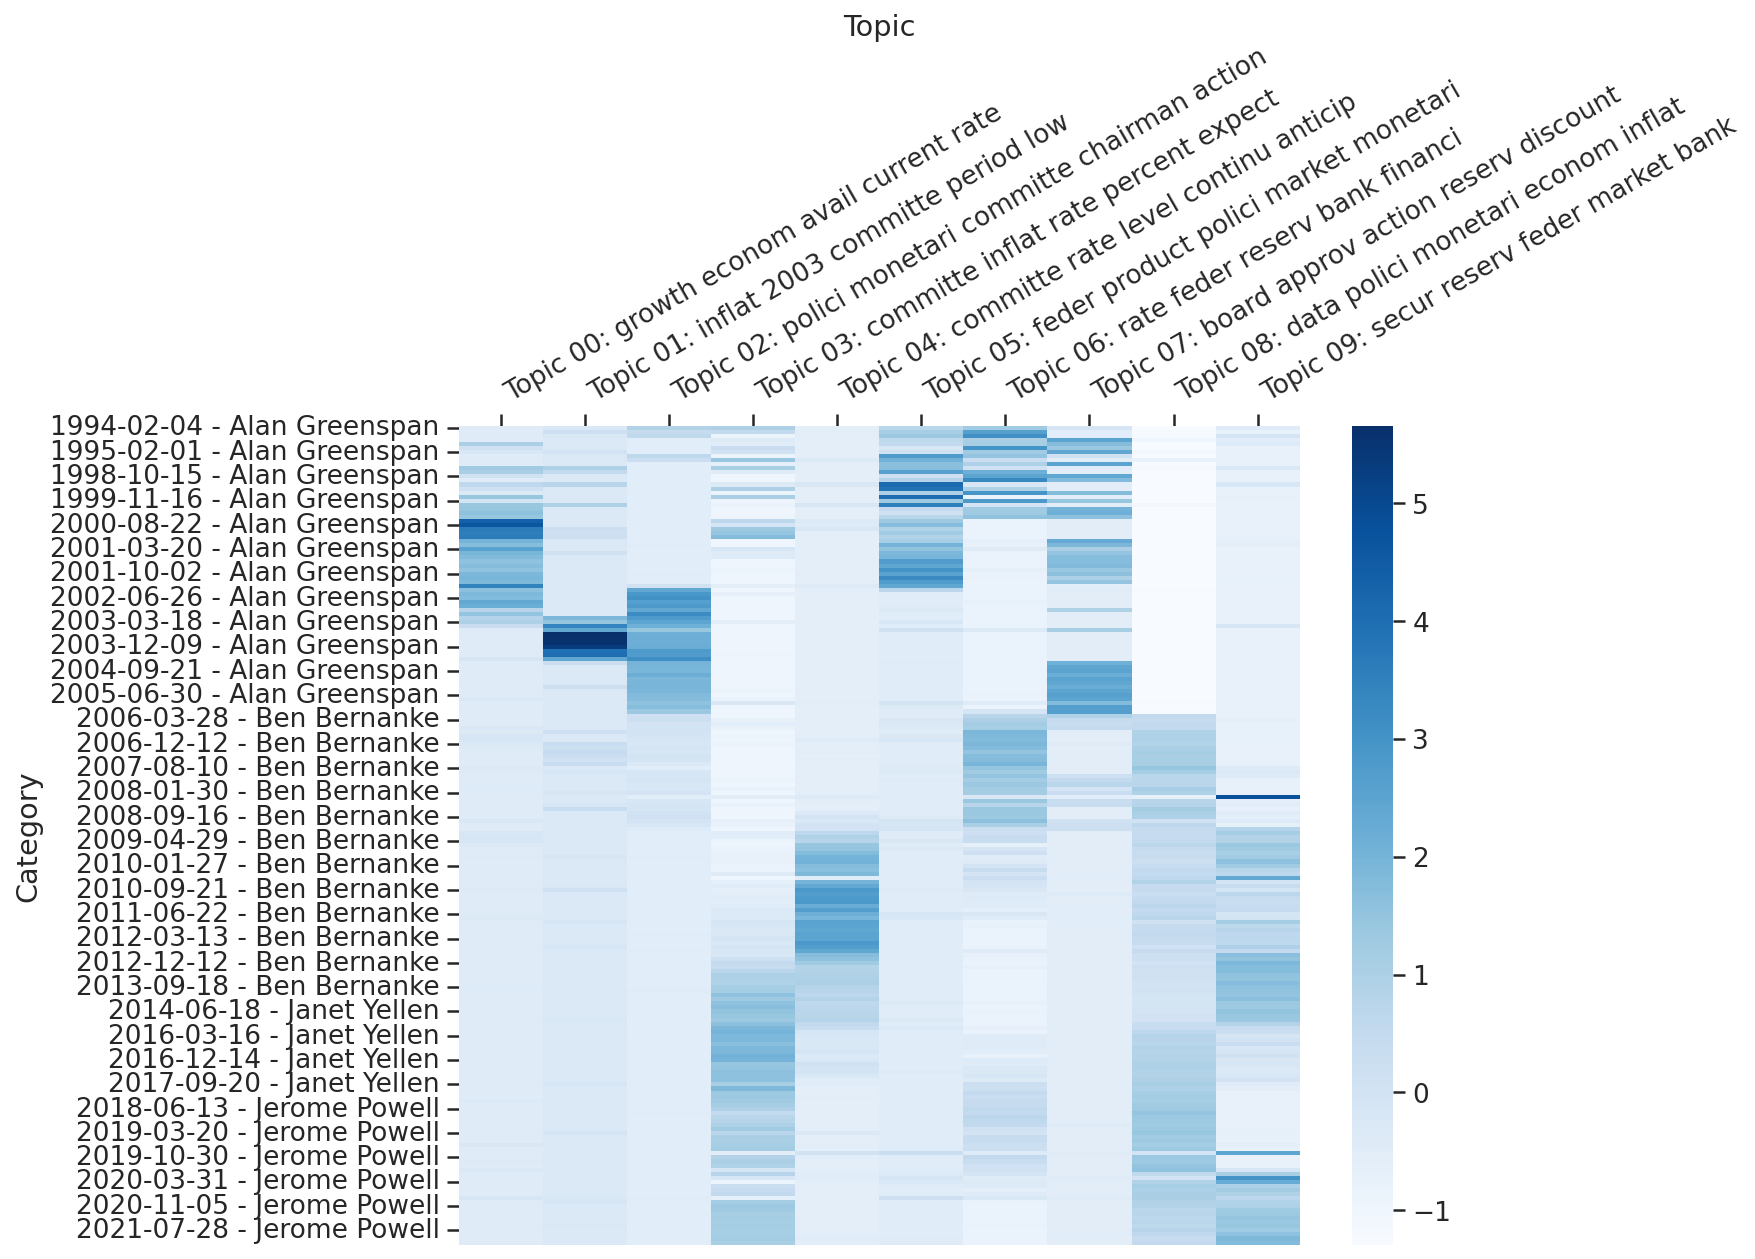

In [ ]:
plot_categories_by_topics_heatmap(
    fomc_data.dt_speaker,
    topic_distributions,
    topic_individual_words,
    color_map="Blues",
    dim=(12, 9),
)

## Output a dataframe

In [ ]:
topic_results = []
for title, topic_distribution in zip(fomc_data.dt_speaker, topic_distributions):
    topic_results.append({"document": title, "topic_distribution": topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [
    f"Topic {number} {' '.join(topic[:4])}"
    for number, topic in enumerate(topic_individual_words)
]
df[column_names] = pd.DataFrame(df["topic_distribution"].tolist(), index=df.index)
df = df.drop("topic_distribution", axis="columns")


In [ ]:
df.head()

,document,Topic 0 growth econom avail current,Topic 1 inflat 2003 committe period,Topic 2 polici monetari committe chairman,Topic 3 committe inflat rate percent,Topic 4 committe rate level continu,Topic 5 feder product polici market,Topic 6 rate feder reserv bank,Topic 7 board approv action reserv,Topic 8 data polici monetari econom,Topic 9 secur reserv feder market
0,1994-02-04 - Alan Greenspan,0.001427,0.000743,0.285406,0.216846,0.001891,0.143563,0.234385,0.072328,0.005053,0.038359
1,1994-03-22 - Alan Greenspan,0.003052,0.039559,0.192843,0.160095,0.004044,0.193185,0.387463,0.002836,0.010809,0.006114
2,1994-04-18 - Alan Greenspan,0.003444,0.001793,0.217633,0.009272,0.004564,0.218019,0.437272,0.003201,0.012199,0.092602
3,1994-05-17 - Alan Greenspan,0.000801,0.000417,0.000786,0.061955,0.001061,0.130439,0.211333,0.499066,0.062636,0.031504
4,1994-08-16 - Alan Greenspan,0.180957,0.000502,0.000946,0.050595,0.001278,0.121049,0.218445,0.372881,0.003416,0.049930
